# Imports

In [1]:
import sys
import os
import random
from operator import add, mul
from pyspark import SparkContext, SparkConf
from pyspark import SparkFiles

In [2]:
cwd = os.getcwd()
for part in cwd.split('/'):
    if part.lower().startswith('edureka'):
        user_id = part.title()
user_id

'Edureka_121039'

In [3]:
app_name = '{0} : RDD Hands-on'.format(user_id)
app_name

'Edureka_121039 : RDD Hands-on'

In [4]:
conf = SparkConf().setAppName(app_name)
sc = SparkContext(conf=conf)

In [5]:
sc.applicationId

u'application_1528714825862_61773'

In [6]:
def get_hdfs_filepath(file_name):
    my_hdfs = '/user/{0}'.format(user_id.lower())
    return os.path.join(my_hdfs, file_name)

# Datasets

In [7]:
SAMPLE = get_hdfs_filepath('sample.txt') # /user/edureka_121039/sample.txt
AIRPORTS = get_hdfs_filepath('airports.csv')
README = get_hdfs_filepath('README.md')
DATA_STR = 'Python is one of the programming languages supported by Apache Spark.'

# Creating RDDs
    * Parallelized Collection

In [8]:
data = DATA_STR.split(' ')
pcoll = sc.parallelize(data)
pcoll.collect()

['Python',
 'is',
 'one',
 'of',
 'the',
 'programming',
 'languages',
 'supported',
 'by',
 'Apache',
 'Spark.']

    * From another RDD

In [9]:
rdd_from_rdd = pcoll.map(lambda word: word.upper())
rdd_from_rdd.collect()

['PYTHON',
 'IS',
 'ONE',
 'OF',
 'THE',
 'PROGRAMMING',
 'LANGUAGES',
 'SUPPORTED',
 'BY',
 'APACHE',
 'SPARK.']

    * From external data - in the form of files

In [10]:
text_file = sc.textFile(SAMPLE)
text_file.map(lambda line: line.upper()).collect()

[u'SPARK CHANGE LOG',
 u'----------------',
 u'',
 u'RELEASE 1.1.0',
 u'',
 u'  [SPARK-3320][SQL] MADE BATCHED IN-MEMORY COLUMN BUFFER BUILDING WORK FOR SCHEMARDDS WITH EMPTY PARTITIONS',
 u'  CHENG LIAN <LIAN.CS.ZJU@GMAIL.COM>',
 u'  2014-08-29 18:16:47 -0700',
 u'  COMMIT: AA9364A, GITHUB.COM/APACHE/SPARK/PULL/2213',
 u'',
 u'  [SPARK-3296][MLLIB] SPARK-EXAMPLE SHOULD BE RUN-EXAMPLE IN HEAD NOTATION OF DENSEKMEANS AND SPARSENAIVEBAYES',
 u'  WANGFEI <WANGFEI_HELLO@126.COM>',
 u'  2014-08-29 17:37:15 -0700',
 u'  COMMIT: B0FACB5, GITHUB.COM/APACHE/SPARK/PULL/2193',
 u'',
 u'  [SPARK-3291][SQL]TESTCASENAME IN CREATEQUERYTEST SHOULD NOT CONTAIN ":"',
 u'  QIPING.LQP <QIPING.LQP@ALIBABA-INC.COM>',
 u'  2014-08-29 15:37:43 -0700',
 u'  COMMIT: C1333B8, GITHUB.COM/APACHE/SPARK/PULL/2191',
 u'',
 u'  [SPARK-3269][SQL] DECREASES INITIAL BUFFER SIZE FOR ROW SET TO PREVENT OOM',
 u'  CHENG LIAN <LIAN.CS.ZJU@GMAIL.COM>',
 u'  2014-08-29 15:36:04 -0700',
 u'  COMMIT: 9BAE345, GITHUB.COM/APACHE/S

# RDD Transformations

Transformation is a function that produces new RDD from the existing RDDs but when we want to work with the actual dataset, at that point Action is performed. When the action is triggered after the result, new RDD is not formed like transformation.
Spark Transformation is a function that produces new RDD from the existing RDDs. It takes RDD as input and produces one or more RDD as output. Each time it creates new RDD when we apply any transformation. Thus, the so input RDDs, cannot be changed since RDD are immutable in nature.

Applying transformation built an RDD lineage, with the entire parent RDDs of the final RDD(s). RDD lineage, also known as RDD operator graph or RDD dependency graph. It is a logical execution plan i.e., it is Directed Acyclic Graph (DAG) of the entire parent RDDs of RDD.

Transformations are lazy in nature i.e., they get execute when we call an action. They are not executed immediately. Two most basic type of transformations is a map(), filter(). After the transformation, the resultant RDD is always different from its parent RDD. It can be smaller (e.g. filter, count, distinct, sample), bigger (e.g. flatMap(), union(), Cartesian()) or the same size (e.g. map).

### map, filter, flatMap, distinct, sortBy, groupBy

In [11]:
# map
rdd = sc.textFile(AIRPORTS)
lines = rdd.map(lambda line: line.split(','))
lines.count()

350

In [12]:
# filter : getting rid of header
lines = lines.filter(lambda cols: cols[0]!='IATA')
lines.count()

349

In [13]:
# flatMap
textFile = sc.textFile(README)
words = textFile.flatMap(lambda line: line.split())
words.take(5)
# mwords = textFile.map(lambda line: line.split())
# mwords.take(5)

[u'#', u'Apache', u'Spark', u'Spark', u'is']

In [14]:
# distinct
codes = lines.map(lambda cols: cols[0])
print(codes.count())
# codes.distinct().collect()
print(codes.distinct().count())

349
341


In [15]:
# sortBy : sort records/rows by first column
lines.sortBy(lambda line: line[1]).take(10)

[[u'ABR',
  u'Aberdeen Regional',
  u'Aberdeen',
  u'SD',
  u'USA',
  u'45.44905556',
  u'-98.42183333'],
 [u'ABI',
  u'Abilene Regional',
  u'Abilene',
  u'TX',
  u'USA',
  u'32.41132',
  u'-99.68189722'],
 [u'ADK', u'Adak', u'Adak', u'AK', u'USA', u'51.87796389', u'-176.6460306'],
 [u'LIT',
  u'Adams ',
  u'Little Rock',
  u'AR',
  u'USA',
  u'34.72939611',
  u'-92.22424556'],
 [u'CAK',
  u'Akron-Canton Regional',
  u'Akron',
  u'OH',
  u'USA',
  u'40.91631194',
  u'-81.44246556'],
 [u'ALB',
  u'Albany Cty',
  u'Albany',
  u'NY',
  u'USA',
  u'42.74811944',
  u'-73.80297861'],
 [u'OAJ',
  u'Albert J Ellis',
  u'Jacksonville',
  u'NC',
  u'USA',
  u'34.82916444',
  u'-77.61213778'],
 [u'ABQ',
  u'Albuquerque International',
  u'Albuquerque',
  u'NM',
  u'USA',
  u'35.0402222',
  u'-106.60919'],
 [u'ABQ',
  u'Albuquerque International',
  u'Albuquerque',
  u'NM',
  u'USA',
  u'35.0402222',
  u'-106.60919'],
 [u'ABQ',
  u'Albuquerque International',
  u'Albuquerque',
  u'NM',
  u'USA',


In [16]:
# sort records/rows by first column and print first column
lines.sortBy(lambda line: line[0]).map(lambda line: line[0]).take(10)

[u'ABE',
 u'ABI',
 u'ABQ',
 u'ABQ',
 u'ABQ',
 u'ABR',
 u'ABY',
 u'ACK',
 u'ACT',
 u'ACV']

In [17]:
# groupBy
grp = words.groupBy(lambda w : w[-1])
print [(k, len(list(v))) for k,v in grp.take(1)]
print [(k, len(list(v))) for k,v in grp.take(4)]

[(u'A', 1)]
[(u'a', 12), (u'A', 1), (u'#', 10), (u'E', 1)]


# Key-Value Pair RDD (a.k.a PairRDD)

#### keyBy, foldByKey, reduceByKey, groupByKey, lookup, mapValues, collectAsMap, countByKey, sortByKey, sampleByKey

In [18]:
# byKey
keywords = words.keyBy(lambda word: word.lower()[0])
keywords.take(10)

[(u'#', u'#'),
 (u'a', u'Apache'),
 (u's', u'Spark'),
 (u's', u'Spark'),
 (u'i', u'is'),
 (u'a', u'a'),
 (u'f', u'fast'),
 (u'a', u'and'),
 (u'g', u'general'),
 (u'c', u'cluster')]

In [19]:
# foldByKey - requires a value  may be added to the result an arbitrary number of times, 
# and must not change the result (e.g., 0 for addition, or 1 for multiplication.)
# rdd = sc.parallelize([("a", 1), ("b", 1), ("a", 4)])
# sorted(rdd.foldByKey(0, add).collect())

rdd = sc.parallelize([("D1", 30), ("D2", 45), ("D1", 40)])
print(rdd.collect())
sorted(rdd.foldByKey(1, mul).collect())

[('D1', 30), ('D2', 45), ('D1', 40)]


[('D1', 1200), ('D2', 45)]

In [20]:
# reduceByKey
rdd = sc.textFile(SAMPLE)
wc = rdd.flatMap(lambda line: line.split(' ')).map(lambda w: (w, 1)) # [('Spark', [1,1,1,1]), ('Python', [1,1,1])]
wc.reduceByKey(lambda a,b: a+b).take(10)

[(u'', 26082),
 (u'EXPLAIN', 2),
 (u'fdc4c11,', 1),
 (u'pwendell/gitignore', 2),
 (u'github.com/apache/spark/pull/165', 1),
 (u'prefix', 2),
 (u'github.com/apache/spark/pull/161', 1),
 (u'15:05:47', 1),
 (u'SPARK-2791:', 1),
 (u'c514cd1', 1)]

In [21]:
# groupByKey
word_freq = wc.groupByKey()
print(list((j[0], sum(list(j[1])) ) for j in word_freq.take(10)))

[(u'', 26082), (u'EXPLAIN', 2), (u'fdc4c11,', 1), (u'pwendell/gitignore', 2), (u'github.com/apache/spark/pull/165', 1), (u'prefix', 2), (u'github.com/apache/spark/pull/161', 1), (u'15:05:47', 1), (u'SPARK-2791:', 1), (u'c514cd1', 1)]


*Note : groupBy and groupByKey can cause out of memory exceptions and are expensive operations.*

While both of groupByKey and reduceByKey can produce the correct answer, the reduceByKey example works much better on a large dataset. That's because Spark knows it can combine output with a common key on each partition before shuffling the data.

In [22]:
# lookup
keywords.lookup('s')

[u'Spark',
 u'Spark',
 u'system',
 u'Scala,',
 u'supports',
 u'supports',
 u'set',
 u'Spark',
 u'SQL',
 u'SQL',
 u'Spark',
 u'Streaming',
 u'stream',
 u'Spark',
 u'setup',
 u'Spark',
 u'Spark',
 u'Spark',
 u'Spark',
 u'see',
 u'site,',
 u'Spark"](http://spark.apache.org/docs/latest/building-spark.html).',
 u'Spark',
 u'see',
 u'Scala',
 u'Shell',
 u'start',
 u'Spark',
 u'Scala',
 u'shell:',
 u'should',
 u'scala>',
 u'sc.parallelize(1',
 u'Shell',
 u'shell:',
 u'should',
 u'sc.parallelize(range(1000)).count()',
 u'Spark',
 u'several',
 u'sample',
 u'SparkPi',
 u'set',
 u'submit',
 u'spark://',
 u'SparkPi',
 u'Spark](#building-spark).',
 u'Spark',
 u'see',
 u'see',
 u'Spark',
 u'storage',
 u'systems.',
 u'Spark',
 u'same',
 u'Spark.',
 u'Spark',
 u'started']

In [23]:
# mapValues
keywords.mapValues(lambda word: word.upper()).collect()

[(u'#', u'#'),
 (u'a', u'APACHE'),
 (u's', u'SPARK'),
 (u's', u'SPARK'),
 (u'i', u'IS'),
 (u'a', u'A'),
 (u'f', u'FAST'),
 (u'a', u'AND'),
 (u'g', u'GENERAL'),
 (u'c', u'CLUSTER'),
 (u'c', u'COMPUTING'),
 (u's', u'SYSTEM'),
 (u'f', u'FOR'),
 (u'b', u'BIG'),
 (u'd', u'DATA.'),
 (u'i', u'IT'),
 (u'p', u'PROVIDES'),
 (u'h', u'HIGH-LEVEL'),
 (u'a', u'APIS'),
 (u'i', u'IN'),
 (u's', u'SCALA,'),
 (u'j', u'JAVA,'),
 (u'p', u'PYTHON,'),
 (u'a', u'AND'),
 (u'r', u'R,'),
 (u'a', u'AND'),
 (u'a', u'AN'),
 (u'o', u'OPTIMIZED'),
 (u'e', u'ENGINE'),
 (u't', u'THAT'),
 (u's', u'SUPPORTS'),
 (u'g', u'GENERAL'),
 (u'c', u'COMPUTATION'),
 (u'g', u'GRAPHS'),
 (u'f', u'FOR'),
 (u'd', u'DATA'),
 (u'a', u'ANALYSIS.'),
 (u'i', u'IT'),
 (u'a', u'ALSO'),
 (u's', u'SUPPORTS'),
 (u'a', u'A'),
 (u'r', u'RICH'),
 (u's', u'SET'),
 (u'o', u'OF'),
 (u'h', u'HIGHER-LEVEL'),
 (u't', u'TOOLS'),
 (u'i', u'INCLUDING'),
 (u's', u'SPARK'),
 (u's', u'SQL'),
 (u'f', u'FOR'),
 (u's', u'SQL'),
 (u'a', u'AND'),
 (u'd', u'DATAFRA

In [24]:
# collectAsMap
keywords.collectAsMap()

{u'"': u'"local[N]"',
 u'#': u'##',
 u'(': u'(You',
 u'-': u'-T',
 u'.': u'./dev/run-tests',
 u'1': u'1000:',
 u'3': u'3"](https://cwiki.apache.org/confluence/display/MAVEN/Parallel+builds+in+Maven+3).',
 u'<': u'<class>',
 u'>': u'>>>',
 u'[': u'[Contribution',
 u'`': u'`examples`',
 u'a': u'an',
 u'b': u'building',
 u'c': u'contributing',
 u'd': u'documentation',
 u'e': u'example',
 u'f': u'for',
 u'g': u'get',
 u'h': u'how',
 u'i': u'information',
 u'j': u'Java,',
 u'k': u'Kubernetes',
 u'l': u'library',
 u'm': u'must',
 u'n': u'Note',
 u'o': u'on',
 u'p': u'proj',
 u'r': u'review',
 u's': u'started',
 u't': u'the',
 u'u': u'uses',
 u'v': u'Version"](http://spark.apache.org/docs/latest/building-spark.html#specifying-the-hadoop-version)',
 u'w': u'with',
 u'y': u'your'}

In [25]:
# sortByKey
pair = lines.map(lambda line: (line[0], line))
pair.sortByKey().take(10)

[(u'ABE',
  [u'ABE',
   u'Lehigh Valley International',
   u'Allentown',
   u'PA',
   u'USA',
   u'40.65236278',
   u'-75.44040167']),
 (u'ABI',
  [u'ABI',
   u'Abilene Regional',
   u'Abilene',
   u'TX',
   u'USA',
   u'32.41132',
   u'-99.68189722']),
 (u'ABQ',
  [u'ABQ',
   u'Albuquerque International',
   u'Albuquerque',
   u'NM',
   u'USA',
   u'35.04022222',
   u'-106.6091944']),
 (u'ABQ',
  [u'ABQ',
   u'Albuquerque International',
   u'Albuquerque',
   u'NM',
   u'USA',
   u'35.0402222',
   u'-106.60919']),
 (u'ABQ',
  [u'ABQ',
   u'Albuquerque International',
   u'Albuquerque',
   u'NM',
   u'USA',
   u'35.0402222',
   u'-106.60919']),
 (u'ABR',
  [u'ABR',
   u'Aberdeen Regional',
   u'Aberdeen',
   u'SD',
   u'USA',
   u'45.44905556',
   u'-98.42183333']),
 (u'ABY',
  [u'ABY',
   u'Southwest Georgia Regional',
   u'Albany',
   u'GA',
   u'USA',
   u'31.535515',
   u'-84.19447333']),
 (u'ACK',
  [u'ACK',
   u'Nantucket Memorial',
   u'Nantucket',
   u'MA',
   u'USA',
   u'41.2

In [26]:
# countByKey
pair.countByKey()

defaultdict(int,
            {u'ABE': 1,
             u'ABI': 1,
             u'ABQ': 3,
             u'ABR': 1,
             u'ABY': 1,
             u'ACK': 1,
             u'ACT': 1,
             u'ACV': 1,
             u'ACY': 1,
             u'ADK': 1,
             u'ADQ': 1,
             u'AEX': 1,
             u'AGS': 1,
             u'AKN': 1,
             u'ALB': 1,
             u'ALO': 1,
             u'AMA': 1,
             u'ANC': 3,
             u'APN': 1,
             u'ART': 1,
             u'ASE': 1,
             u'ATL': 2,
             u'ATW': 1,
             u'AUS': 2,
             u'AVL': 1,
             u'AVP': 1,
             u'AZO': 1,
             u'BDL': 2,
             u'BET': 1,
             u'BFL': 1,
             u'BGM': 1,
             u'BGR': 1,
             u'BHM': 2,
             u'BIL': 1,
             u'BIS': 1,
             u'BJI': 1,
             u'BLI': 1,
             u'BMI': 1,
             u'BNA': 1,
             u'BOI': 1,
             u'BOS': 1,

In [27]:
# sampleByKey (deterministic(T/F), fraction, seed)
#     get all distinct characters
distinctChars = words.flatMap(lambda word: list(word.lower())).distinct().collect()
print(distinctChars)
sampleMap = dict(map(lambda c: (c, random.random()), distinctChars))
print(sampleMap)
words.map(lambda word: (word.lower()[0], word)).sampleByKey(True, sampleMap, 6).collect()

[u'#', u')', u'+', u'-', u'/', u'1', u'3', u'7', u'=', u'[', u']', u'a', u'c', u'e', u'g', u'i', u'k', u'm', u'o', u'q', u's', u'u', u'w', u'y', u'"', u'(', u',', u'.', u'0', u':', u'<', u'>', u'`', u'b', u'd', u'f', u'h', u'j', u'l', u'n', u'p', u'r', u't', u'v', u'x', u'z']
{u'#': 0.15110705730177754, u'"': 0.819705758511117, u')': 0.10748644970181054, u'(': 0.43448169861881314, u'+': 0.8253052544137963, u'-': 0.5100290935204881, u',': 0.8090864338751836, u'/': 0.047573651510410264, u'.': 0.005351232784224669, u'1': 0.5807448326488003, u'0': 0.6013934880450759, u'3': 0.21964485046493132, u'7': 0.44394472134765894, u':': 0.3280913864278825, u'=': 0.969015520331527, u'<': 0.16856230308938103, u'>': 0.7968080866547387, u'[': 0.44985832828864225, u']': 0.6769388274232561, u'a': 0.9892400019257305, u'`': 0.7662636330974439, u'c': 0.8084717784383554, u'b': 0.8523431890907075, u'e': 0.029972476548431826, u'd': 0.871348730626858, u'g': 0.4447626328597787, u'f': 0.2926030275913519, u'i': 0.85

[(u'a', u'Apache'),
 (u'a', u'Apache'),
 (u'a', u'a'),
 (u'a', u'a'),
 (u'f', u'fast'),
 (u'a', u'and'),
 (u'c', u'cluster'),
 (u'c', u'cluster'),
 (u'd', u'Data.'),
 (u'd', u'Data.'),
 (u'i', u'It'),
 (u'p', u'provides'),
 (u'p', u'provides'),
 (u'p', u'provides'),
 (u'h', u'high-level'),
 (u'h', u'high-level'),
 (u'h', u'high-level'),
 (u'i', u'in'),
 (u'p', u'Python,'),
 (u'p', u'Python,'),
 (u'a', u'and'),
 (u'a', u'and'),
 (u'o', u'optimized'),
 (u'o', u'optimized'),
 (u'g', u'general'),
 (u'a', u'analysis.'),
 (u'a', u'also'),
 (u's', u'supports'),
 (u'a', u'a'),
 (u'a', u'a'),
 (u'a', u'a'),
 (u'a', u'a'),
 (u'r', u'rich'),
 (u'r', u'rich'),
 (u'o', u'of'),
 (u't', u'tools'),
 (u'i', u'including'),
 (u'f', u'for'),
 (u'l', u'learning,'),
 (u'a', u'and'),
 (u's', u'Spark'),
 (u'f', u'for'),
 (u'f', u'for'),
 (u'o', u'Online'),
 (u'o', u'Online'),
 (u't', u'the'),
 (u'd', u'documentation,'),
 (u'd', u'documentation,'),
 (u'a', u'a'),
 (u'a', u'a'),
 (u'p', u'programming'),
 (u'p',

# RDD Functions - Math / Statistical
These are functions (precisely actions) that are supported over RDD of doubles (in Java parlance), In PySpark, these are regular functions that expect list of int/float values.

    min, max, mean, sum, variance, stats

In [28]:
rdd_num = sc.parallelize([9,1,8,7,6,-12,0,84,36,-3])
rdd_num.min(), rdd_num.max(), rdd_num.mean(), rdd_num.sum(), rdd_num.variance(), rdd_num.stdev()

(-12, 84, 13.6, 136, 688.6400000000001, 26.241951146970763)

In [29]:
rdd_num.stats() # returns : count, mean, stdev, max, min

(count: 10, mean: 13.6, stdev: 26.241951147, max: 84.0, min: -12.0)

**Note**, functions like mean, sum, variance, stdev work only over numeric data. Min/Max can work over all types : str, int, float and even mixed types.

In [30]:
d = sc.parallelize(['a','b',1,2,6,9.0])
d.max(), d.min()

('b', 1)

In [31]:
d.sum(), d.mean()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 49.0 failed 4 times, most recent failure: Lost task 0.3 in stage 49.0 (TID 91, ip-20-0-31-4.ec2.internal, executor 1): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/cloudera/parcels/SPARK2-2.1.0.cloudera2-1.cdh5.7.0.p0.171658/lib/spark2/python/lib/pyspark.zip/pyspark/worker.py", line 171, in main
    process()
  File "/opt/cloudera/parcels/SPARK2-2.1.0.cloudera2-1.cdh5.7.0.p0.171658/lib/spark2/python/lib/pyspark.zip/pyspark/worker.py", line 166, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/cloudera/parcels/SPARK2/lib/spark2/python/pyspark/rdd.py", line 2408, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/opt/cloudera/parcels/SPARK2/lib/spark2/python/pyspark/rdd.py", line 345, in func
    return f(iterator)
  File "/opt/cloudera/parcels/SPARK2/lib/spark2/python/pyspark/rdd.py", line 1031, in <lambda>
    return self.mapPartitions(lambda x: [sum(x)]).fold(0, operator.add)
TypeError: unsupported operand type(s) for +: 'int' and 'str'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:325)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1430)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1417)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1417)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:797)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:797)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:797)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1645)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1600)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1589)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:623)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1930)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1943)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1956)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1970)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:935)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:934)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:453)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor40.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/cloudera/parcels/SPARK2-2.1.0.cloudera2-1.cdh5.7.0.p0.171658/lib/spark2/python/lib/pyspark.zip/pyspark/worker.py", line 171, in main
    process()
  File "/opt/cloudera/parcels/SPARK2-2.1.0.cloudera2-1.cdh5.7.0.p0.171658/lib/spark2/python/lib/pyspark.zip/pyspark/worker.py", line 166, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/cloudera/parcels/SPARK2/lib/spark2/python/pyspark/rdd.py", line 2408, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/opt/cloudera/parcels/SPARK2/lib/spark2/python/pyspark/rdd.py", line 345, in func
    return f(iterator)
  File "/opt/cloudera/parcels/SPARK2/lib/spark2/python/pyspark/rdd.py", line 1031, in <lambda>
    return self.mapPartitions(lambda x: [sum(x)]).fold(0, operator.add)
TypeError: unsupported operand type(s) for +: 'int' and 'str'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:325)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
d = sc.parallelize([1,2,6,9.0])

# RDD Functions - Set Theory / Relational
<font size=1>*(slide 64)*</font>

    intersection, union, join, cartesian, subtract, subtractByKey, leftOuterJoin, rightOuterJoin, fullOuterJoin, cogroup

In [32]:
# intersection
rdd1 = sc.parallelize([1, 10, 2, 3, 4, 5])
rdd2 = sc.parallelize([1, 6, 2, 3, 7, 8])
rdd1.intersection(rdd2).collect()

[1, 2, 3]

In [33]:
# union
rdd1.union(rdd2).collect()

[1, 10, 2, 3, 4, 5, 1, 6, 2, 3, 7, 8]

In [34]:
# cartesian
cart1 = sc.parallelize([('a',72),('b',42),('a',24)])
cart2 = sc.parallelize([('b',12),('a',24),('d',12)])
cart1.cartesian(cart2).collect()

[(('a', 72), ('b', 12)),
 (('a', 72), ('a', 24)),
 (('a', 72), ('d', 12)),
 (('b', 42), ('b', 12)),
 (('a', 24), ('b', 12)),
 (('b', 42), ('a', 24)),
 (('b', 42), ('d', 12)),
 (('a', 24), ('a', 24)),
 (('a', 24), ('d', 12))]

In [35]:
# subtract
print(cart1.subtract(cart2).collect())
print(cart2.subtract(cart1).collect())

[('a', 72), ('b', 42)]
[('b', 12), ('d', 12)]


In [36]:
# subtractByKey
print(cart1.subtractByKey(cart2).collect())
print(cart2.subtractByKey(cart1).collect())

[]
[('d', 12)]


In [37]:
# Dataset 1 : k-v pairs
d1 = sc.parallelize([("a", 1), ("b", 4), ("b", 3)], 3)

# Dataset 2 : k-v pairs
d2 = sc.parallelize([("a", 2), ("c", 8), ("a", 3)], 3)

In [38]:
# join : perfoms exact key match between 2 RDDs, similar to database INNER JOIN
sorted(d1.join(d2).collect())

[('a', (1, 2)), ('a', (1, 3))]

In [39]:
# leftOuterJoin : includes all keys from left RDD and includes matching keys from right RDD
sorted(d1.leftOuterJoin(d2).collect())

[('a', (1, 2)), ('a', (1, 3)), ('b', (3, None)), ('b', (4, None))]

In [40]:
# rightOuterJoin : includes all keys from right RDD and includes matching keys from left RDD
sorted(d1.rightOuterJoin(d2).collect())

[('a', (1, 2)), ('a', (1, 3)), ('c', (None, 8))]

In [41]:
# fullOuterJoin : combines common keys and includes all individual keys from 2 RDDs
sorted(d1.fullOuterJoin(d2).collect())

[('a', (1, 2)),
 ('a', (1, 3)),
 ('b', (3, None)),
 ('b', (4, None)),
 ('c', (None, 8))]

In [42]:
# cogroup - similar to relation database operation FULL OUTER JOIN, but instead
# of flattening the result per line per record, it returns as interable interface
[(a, tuple(map(list, b))) for a, b in sorted(list(d1.cogroup(d2).collect()))]

[('a', ([1], [2, 3])), ('b', ([4, 3], [])), ('c', ([], [8]))]

# RDD Actions

### <font color=blue>*first, count, collect, take*</font>, top, reduce, takeOrdered, countByValue, countByKey

In [43]:
# top : returns the list sorted in descending order
# * should only be used if the resulting array is expected to be small, 
# as all the data is loaded into the driver’s memory
rdd_num = sc.parallelize([1, 20, -3, 4, 15])
print(rdd_num.top(3))
words = sc.parallelize(['hello', 'python', 'anaconda', 'hi', 'python', 'anaconda'])
print(words.top(3))
print(words.first())

[20, 15, 4]
['python', 'python', 'hi']
hello


In [44]:
# reduce
rdd_num = sc.parallelize([1, 2, 3, 4, 5])
print(rdd_num.reduce(add))
print(rdd_num.reduce(mul))

15
120


In [45]:
# takeOrdered
rdd_num = sc.parallelize([1, 20, -3, 4, 15])
rdd_num.takeOrdered(3)

[-3, 1, 4]

In [46]:
# countByValue : returns (value, count) pairs
words = sc.parallelize(['hello', 'python', 'anaconda', 'hi', 'python', 'anaconda'])
sorted(words.countByValue().items())

[('anaconda', 2), ('hello', 1), ('hi', 1), ('python', 2)]

In [47]:
# countByKey
d1 = sc.parallelize([("a", 1), ("b", 4), ("b", 3)], 3)
sorted(d1.countByKey().items())

[('a', 1), ('b', 2)]

# Data Loading and Saving

In [48]:
# saveAsTextFile
samples = sc.parallelize([("steve@fakemail.com", "Steve", "Jobs"),("dtrump@fakemail.com", "Daniel", "Trumpet"),("stranger@fakemail.com", "Stranger", "Weird")])
samples.saveAsTextFile("somewhere/here.txt") # /user/edureka_123456/somewhere/here.txt
# sc.textFile('somewhere/here.txt').collect() # load back file records

Py4JJavaError: An error occurred while calling o1006.saveAsTextFile.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory hdfs://nameservice1/user/edureka_121039/somewhere/here.txt already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply$mcV$sp(PairRDDFunctions.scala:1191)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply(PairRDDFunctions.scala:1168)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply(PairRDDFunctions.scala:1168)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1168)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply$mcV$sp(PairRDDFunctions.scala:1071)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply(PairRDDFunctions.scala:1037)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply(PairRDDFunctions.scala:1037)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1037)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply$mcV$sp(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:962)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply$mcV$sp(RDD.scala:1488)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply(RDD.scala:1467)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply(RDD.scala:1467)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1467)
	at org.apache.spark.api.java.JavaRDDLike$class.saveAsTextFile(JavaRDDLike.scala:550)
	at org.apache.spark.api.java.AbstractJavaRDDLike.saveAsTextFile(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


In [49]:
sc.addFile('/mnt/home/edureka_121039/new_sample.txt')
new_sample = sc.textFile(SparkFiles.get('new_sample.txt'))

In [50]:
new_sample.collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: hdfs://nameservice1/tmp/spark-da594910-b184-4827-af12-6453d265cdaf/userFiles-246fb2b3-a188-4558-9d4e-5b5bb3f0bc52/new_sample.txt
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:287)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:229)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:315)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:202)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:252)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:250)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:250)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:252)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:250)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:250)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1970)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:935)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:934)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:453)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor40.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


# Shuffling

Operations which can cause a shuffle include repartition operations like **repartition** and **coalesce**, **‘ByKey** operations (except for counting) like **groupByKey** and **reduceByKey**, and join operations like **cogroup** and **join**.

The Shuffle is an expensive operation since it involves disk I/O, data serialization, and network I/O.

Certain shuffle operations can consume significant amounts of heap memory since they employ in-memory data structures to organize records before or after transferring them.

Shuffle also generates a large number of intermediate files on disk.

Spark also automatically persists some intermediate data in shuffle operations (e.g. reduceByKey), even without users calling persist. This is done to avoid recomputing the entire input if a node fails during the shuffle.

<font size=1>*(slide 35)*</font>

# RDD Functions - Miscellaneous

### countApprox, coalesce, zip, persist, sample, toDebugString, unpersist
<font size=1>*(Persistence : slide 67)*</font>

In [51]:
# countApprox(timeout, confidence=0.95)
# Approximate version of count() that returns a potentially incomplete result within a timeout, 
# even if not all tasks have finished.
rdd = sc.parallelize(range(10,1000,10), 10)
print(rdd.countApprox(600, 1.0))
rdd.getNumPartitions()

99


10

In [52]:
# coalesce : Return a new RDD which is reduced to a smaller number of partitions
# coalesce(numPartitions, shuffle=False)

orig = sc.parallelize([1, 2, 3, 4, 5], 3)
new = orig.coalesce(2)

print(orig.glom().collect())
print(new.glom().collect())
new.getNumPartitions()
# glom : Return an RDD created by coalescing all elements within each partition into a list.

[[1], [2, 3], [4, 5]]
[[1], [2, 3, 4, 5]]


2

In [53]:
# zip - zip together 2 RDDs of same length
words = sc.parallelize(DATA_STR.split(' '))
nums = sc.parallelize(range(words.count()))
words.zip(nums).collect() # list of (word, index) pairs.
# words.zip(nums).map(lambda x: (x[1], x[0])).collect() : swap index with word (index, word)

[('Python', 0),
 ('is', 1),
 ('one', 2),
 ('of', 3),
 ('the', 4),
 ('programming', 5),
 ('languages', 6),
 ('supported', 7),
 ('by', 8),
 ('Apache', 9),
 ('Spark.', 10)]

In [54]:
# persist
readme = sc.textFile(README)
readme.persist() # or .cache() - both default to MEMORY_ONLY level
readme.is_cached

True

In [55]:
# sample(withReplacement, fraction, seed=None)
# fraction : expected size of the sample as a fraction of this RDD’s size without replacement: probability that each element 
# is chosen; fraction must be [0, 1] with replacement: expected number of times each element is chosen; fraction must be >= 0
rdd = sc.parallelize(range(1000), 10)
rdd.sample(False, 0.1).count() # this may return biased dataset

93

In [56]:
# toDebugString : returns printable version of the configuration
words.toDebugString()

'(2) ParallelCollectionRDD[202] at parallelize at PythonRDD.scala:475 []'

In [57]:
# unpersist : will remove all blocks from disk and memory
readme.unpersist()
readme.is_cached

False

# Demo - Word Count
<font size=1>*(slide 71)*</font>

In [58]:
rdd = sc.textFile(SAMPLE)
wc = rdd.flatMap(lambda line: line.split(' ')) \
        .map(lambda w: (w, 1)) \
        .reduceByKey(lambda a,b: a+b) \
        .map(lambda (a,b): (b,a)) \
        .sortByKey(ascending=False)
output = wc.collect()

In [59]:
for (count, word) in output:
    print('%s: %i' % (word, count))

: 26082
-0700: 2287
Commit:: 2203
from: 994
pull: 896
request: 889
Merge: 888
in: 720
to: 673
-0800: 648
2013: 625
for: 483
and: 351
of: 340
the: 307
Patrick: 238
Wendell: 235
<pwendell@gmail.com>: 231
Fix: 193
on: 165
Spark: 159
Michael: 154
Armbrust: 151
a: 151
Andrew: 149
Add: 148
Xin: 148
<michael@databricks.com>: 146
with: 145
[SQL]: 141
when: 138
Jan: 137
2014: 136
fix: 133
Reynold: 133
Tue: 127
<rxin@apache.org>: 127
Thu: 126
Wed: 120
Mon: 113
Or: 112
use: 112
Xiangrui: 111
Meng: 111
<andrewor14@gmail.com>: 111
<meng@databricks.com>: 104
Oct: 104
not: 104
Fri: 102
is: 101
Dec: 100
should: 99
Sat: 92
Aug: 89
Nov: 86
Cheng: 85
[Fix: 84
Sun: 80
by: 79
Owen: 74
bug: 71
Sean: 71
Jul: 71
-0500: 67
test: 66
Aaron: 65
<witgo@qq.com>: 62
build: 62
Sep: 61
that: 61
Das: 61
Python: 61
[Add: 61
Tathagata: 61
Lian: 60
if: 59
version: 59
Davidson: 59
<aaron@databricks.com>: 59
Remove: 59
support: 57
as: 57
<sowen@cloudera.com>: 57
Zadeh: 54
<lian.cs.zju@gmail.com>: 54
<rizlar@gmail.com>: 54
R

[Updating: 3
Wrap: 3
examples.]: 3
dependency.: 3
disabled: 3
2014-06-27: 3
weight: 3
thrown: 3
checkpoint: 3
passed: 3
finding: 3
Koert: 3
#526: 3
#524: 3
workers: 3
[Small: 3
20:45:29: 3
2014-06-07: 3
Load: 3
partitioning: 3
etc.: 3
associated: 3
mapPartitions: 3
[SPARK-3011][SQL]: 3
hadoop2-yarn: 3
crash: 3
indexing: 3
jyotiska: 3
=: 3
Gregory: 3
Catch: 3
serializers: 3
commands: 3
Bump: 3
function]: 3
will: 3
README.md: 3
UsageError: 2
github.com/apache/spark/pull/162: 2
typos,: 2
Ordering.: 2
2014-03-30: 2
18:25:54: 2
22:46:47: 2
Harvey: 2
replace: 2
files.: 2
"/".: 2
hive-exec: 2
13:31:23: 2
Snappy: 2
16:52:49: 2
[SPARK-1774]: 2
alias: 2
#589: 2
SPARK-1746:: 2
AllScalaRegistrar: 2
Start: 2
17:48:52: 2
[SPARK-1897]: 2
ankurdave/vid-varenc: 2
17:58:42: 2
SPARK-1539:: 2
"-XX:+UseCompressedStrings": 2
github.com/apache/spark/pull/13: 2
#118: 2
#444: 2
#112: 2
[SPARK-1981]: 2
github.com/apache/spark/pull/364: 2
github.com/apache/spark/pull/362: 2
TaskContext: 2
patch: 2
them.: 2
githu

20:14:56: 1
7c10b3e: 1
9fe28c3,: 1
ankurdave/graphx: 1
0f077b5: 1
23:23:26: 1
358ae15,: 1
b92d16b,: 1
b3ad707,: 1
1f4a4bc: 1
SPARK-2481:: 1
00:28:00: 1
f705c1d,: 1
10:22:27: 1
10d0421,: 1
ColumnType: 1
bfd2f39,: 1
09b8a3c,: 1
transferTo: 1
[some: 1
parser.: 1
100.0: 1
blockmanager: 1
45e9bc8,: 1
17:34:09: 1
3fcc68b: 1
Tools: 1
github.com/apache/spark/pull/240: 1
19b4bb2,: 1
Build.]: 1
MATHIEU: 1
github.com/apache/spark/pull/714: 1
[SPARK-1997]: 1
github.com/apache/spark/pull/12: 1
14:21:40: 1
#119: 1
#113: 1
11:03:38: 1
Extend: 1
11:03:32: 1
beb705a,: 1
github.com/apache/spark/pull/1019: 1
other...: 1
dc9ce16: 1
dd681f5,: 1
metrics-graphite]: 1
22:33:00: 1
5e69fc5: 1
b8bf04a: 1
e4d6057: 1
Lijie: 1
11:33:11: 1
2053d79,: 1
github.com/apache/spark/pull/1350: 1
github.com/apache/spark/pull/1352: 1
github.com/apache/spark/pull/1354: 1
github.com/apache/spark/pull/369: 1
preemptively: 1
dcrankshaw/remove_sleep: 1
[SPARK-2954]: 1
8fc68d0: 1
[SPARK-2204]: 1
17:42:08: 1
traverse: 1
github.com/a

16:14:06: 1
23:17:05: 1
22:30:54: 1
update:: 1
6da8f41,: 1
c6a0091,: 1
github.com/apache/spark/pull/280: 1
23cc40e,: 1
up:: 1
14:54:26: 1
19:00:57: 1
ec2-metadata: 1
MartinWeindel/scala-2.10: 1
f20093c: 1
github.com/apache/spark/pull/1523: 1
01:46:50: 1
<kballou@devnulllabs.io>: 1
#634: 1
LabeledPoint.parse: 1
13:53:08: 1
2266]: 1
SPARK-1478.2: 1
10:13:03: 1
22:56:07: 1
7375047: 1
17:19:28: 1
<396154235@qq.com>,: 1
14:53:49: 1
SCALA_HOME: 1
c344ed0: 1
#412: 1
25b01fd,: 1
0661cdc: 1
21:10:26: 1
reduceByKeyLocally: 1
#148: 1
6ce0884,: 1
Put: 1
110e825,: 1
3a067b4: 1
9df8683,: 1
521d435,: 1
mem: 1
2ce23a5: 1
active: 1
2e32fc8: 1
11:24:22: 1
8fe562c: 1
556c566,: 1
Yadid: 1
7e19334,: 1
f14b00a,: 1
0088ced,: 1
22abbc1: 1
b352ef1,: 1
6596392,: 1
87676a6: 1
14:51:47: 1
Mesos]: 1
github.com/apache/spark/pull/2045: 1
github.com/apache/spark/pull/1615: 1
github.com/apache/spark/pull/2047: 1
github.com/apache/spark/pull/2043: 1
Included: 1
ahirreddy/simr-spark-ui: 1
exception]: 1
Manen: 1
13:41:38

17:47:34: 1
15:13:28: 1
[SPARK-1940]: 1
github.com/apache/spark/pull/1862: 1
19:02:06: 1
Code/Docs: 1
16:57:16: 1
file]: 1
2014-02-10: 1
2014-02-14: 1
<lewandowski.jacek@gmail.com>: 1
Consistent: 1
d8d3f3e: 1
16:38:57: 1
user.: 1
spark.util.collection.BitSet: 1
25fc318,: 1
230ab27: 1
19:12:41: 1
.sortBy(f): 1
c399baa,: 1
64e136a,: 1
f99401a,: 1
16:44:54: 1
57fcfc7: 1
spark.git: 1
8ba7f40,: 1
00:05:27: 1
0feb349: 1
4da01e3,: 1
ScrapCodes/style.: 1
4423386,: 1
Daemoen/master: 1
1b5eacb: 1
apache/spark#946: 1
tooltips: 1
#322: 1
[DistributedSuite:: 1
#328: 1
b9128d3: 1
failed.: 1
409866b: 1
18:53:03: 1
metrics.Source: 1
01:24:32: 1
9bf192b: 1
polling: 1
Docs:: 1
2156]: 1
Functions: 1
workDirPath: 1
dcea67f,: 1
(without: 1
[SPARK-3058]: 1
08:20:13: 1
19:20:22: 1
16:52:02: 1
work.]: 1
18:07:13: 1
Link: 1
ConstantFolding: 1
renders: 1
spark.yarn.dist.*: 1
13:54:03: 1
18:16:55: 1
f5ace8d,: 1
recomputing: 1
srowen/master: 1
758e543: 1
16:33:54: 1
tgravescs/yarn_client_addjar_misc_fixes: 1
lian

71d4ed2,: 1
Borisova: 1
DAGScheduler]: 1
5364f64: 1
Substring.: 1
21:05:12: 1
[Optimize: 1
false.]: 1
github.com/apache/spark/pull/1326: 1
e039234: 1
github.com/apache/spark/pull/1009: 1
stored: 1
mateiz/jets3t: 1
17:58:28: 1
github.com/apache/spark/pull/133: 1
github.com/apache/spark/pull/131: 1
heartbeats: 1
compile.]: 1
e09139d,: 1
SPARK-2148: 1
Changed: 1
SPARK-2414: 1
builds;: 1
local:: 1
bde9cc1,: 1
22:28:05: 1
894d48f,: 1
03b4242,: 1
19:07:20: 1
33baf14: 1
0.8.0-incubating: 1
fed6303,: 1
github.com/apache/spark/pull/1339: 1
17:47:46: 1
6bcdb76: 1
21e40ed,: 1
github.com/apache/spark/pull/1335: 1
github.com/apache/spark/pull/1870: 1
[SPARK-2314][SQL]: 1
github.com/apache/spark/pull/1878: 1
github.com/apache/spark/pull/1333: 1
7f17208,: 1
12:08:28: 1
sphere]: 1
SPARK-1084.2: 1
16:38:43: 1
constructors: 1
13:14:33: 1
4107cce,: 1
subgraph.: 1
[SPARK-2797]: 1
pool.]: 1
types.]: 1
96f28c9,: 1
14:04:39: 1
a9df703: 1
12:43:21: 1
672904e,: 1
19:58:40: 1
405bfe8: 1
Pruning.]: 1
10:51:28: 1

14:34:03: 1
github.com/apache/spark/pull/1650: 1
github.com/apache/spark/pull/1652: 1
1cbbe94: 1
[SPARK-1466]: 1
[SPARK-1912]: 1
#8: 1
[Consistently: 1
collects: 1
79d07d6,: 1
#6: 1
#4: 1
7b0d5a5: 1
#309: 1
#307: 1
K-means]: 1
[Currying: 1
JobProgressListener: 1
debugging]: 1
overwriting: 1
workerRunnable: 1
c3cf047: 1
fcf30cd,: 1
22:05:53: 1
a61b71c,: 1
ApproxCountDistinctMergeFunction: 1
[SPARK-821:: 1
10:03:58: 1
[SPARK-3116]: 1
12:18:41: 1
default.]: 1
[SPARK-1398]: 1
14:47:23: 1
pyspark.sql: 1
a21f9a7,: 1
08:42:30: 1
13:31:38: 1
"Enabled: 1
2d477fd: 1
f397e92,: 1
96e0fb4: 1
[SPARK-2053][SQL]: 1
#716: 1
#710: 1
#712: 1
10:00:02: 1
SessionState: 1
FlumeReceiver: 1
c06a307: 1
[SPARK-2452]: 1
e97a2e6,: 1
7b71a0e,: 1
jopt: 1
`branch-0.8`]: 1
20:11:29: 1
7863ecc,: 1
mapPartitions.: 1
13:01:26: 1
12:10:32: 1
1197280: 1
events]: 1
[[SPARK-1060]: 1
16:42:17: 1
15:08:23: 1
local://: 1
b6d40b782327188a25ded5b22790552121e5271f.]: 1
09:46:48: 1
IP: 1
c137928,: 1
IN: 1
changing: 1
SQLConf.scala

# RDD Lineage of Word Count on Spark WebUI
<font size=1>*(slide 78)*</font>

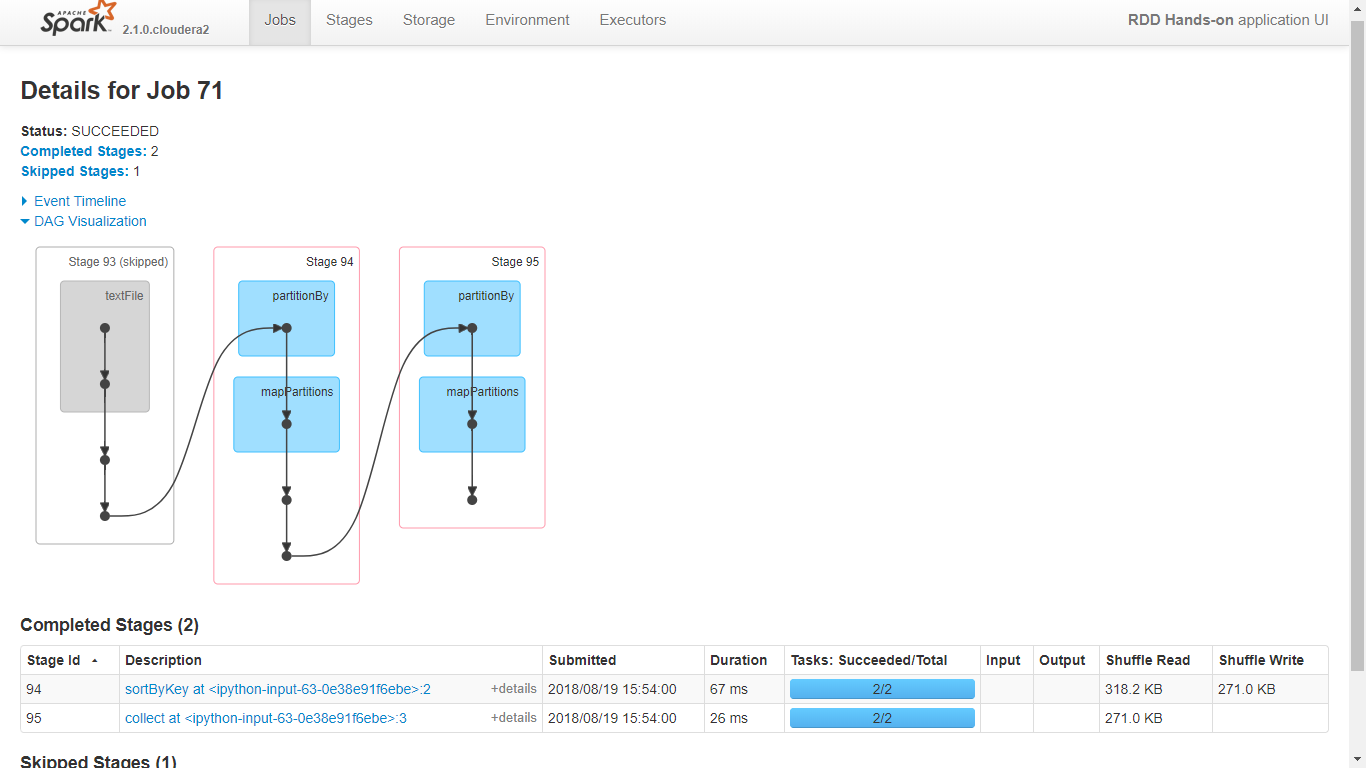

# RDD Partitions & Parallelism
<font size=1>*(slide 81)*</font>

In [60]:
rdd = sc.parallelize(range(1, 25), 3)
print(rdd.collect())
rdd.getNumPartitions()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


3

2 represents the number of partitions RDD is split into which in turn runs them parallely. (refer partitions on History Server)

# Diff between Map & FlatMap

In [61]:
PYHELLO = get_hdfs_filepath('pyhello.txt')

In [62]:
rdd = sc.textFile(PYHELLO)
rdd.collect()

[u'Hello Python', u'How are you?', u'Hope all is well.']

In [63]:
rdd.map(lambda line: line.split()).collect()

[[u'Hello', u'Python'],
 [u'How', u'are', u'you?'],
 [u'Hope', u'all', u'is', u'well.']]

In [64]:
rdd.flatMap(lambda line: line.split()).collect()

[u'Hello',
 u'Python',
 u'How',
 u'are',
 u'you?',
 u'Hope',
 u'all',
 u'is',
 u'well.']

# Passing functions to transformations/actions

    * Using lambda expression - does not support multi-statement functions/statements that do not return a value

In [65]:
lines = sc.textFile(README)
pythonLines = lines.filter(lambda line: 'Python' in line)
pythonLines.first()

u'high-level APIs in Scala, Java, Python, and R, and an optimized engine that'

    * Using local functions

In [66]:
def hasPython(s):
    return 'Python' in s

In [67]:
pythonLines = lines.filter(hasPython)
pythonLines.first()

u'high-level APIs in Scala, Java, Python, and R, and an optimized engine that'

# Shared Variables
<font size=1>*(slide 99)*</font>

    * Broadcast

In [76]:
b = sc.broadcast([3,6,9,12,13,14,15,16,17,18,19,20,30,40,50,60])
b.value

[3, 6, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60]

In [77]:
sc.parallelize([0,0]).flatMap(lambda x : b.value).collect()

[3,
 6,
 9,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 30,
 40,
 50,
 60,
 3,
 6,
 9,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 30,
 40,
 50,
 60]

In [70]:
b.unpersist() # using unpersist only removes broadcast var from executor
sc.parallelize([0,0]).flatMap(lambda x : b.value).collect()

[3, 6, 9, 12, 3, 6, 9, 12]

In [71]:
# to remove it from driver as well use
b.destroy()
sc.parallelize([0,0]).flatMap(lambda x : b.value).collect() # results in error as broadcast variable is destroyed

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Task not serializable
	at org.apache.spark.util.ClosureCleaner$.ensureSerializable(ClosureCleaner.scala:298)
	at org.apache.spark.util.ClosureCleaner$.org$apache$spark$util$ClosureCleaner$$clean(ClosureCleaner.scala:288)
	at org.apache.spark.util.ClosureCleaner$.clean(ClosureCleaner.scala:108)
	at org.apache.spark.SparkContext.clean(SparkContext.scala:2106)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1955)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1970)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:935)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:934)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:453)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor40.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: org.apache.spark.SparkException: Attempted to use Broadcast(105) after it was destroyed (destroy at NativeMethodAccessorImpl.java:0) 
	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1288)
	at org.apache.spark.broadcast.TorrentBroadcast.writeObject(TorrentBroadcast.scala:201)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeWriteObject(ObjectStreamClass.java:1028)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1496)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:348)
	at java.util.ArrayList.writeObject(ArrayList.java:762)
	at sun.reflect.GeneratedMethodAccessor60.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeWriteObject(ObjectStreamClass.java:1028)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1496)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1509)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1509)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1509)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1509)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:348)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:43)
	at org.apache.spark.serializer.JavaSerializerInstance.serialize(JavaSerializer.scala:100)
	at org.apache.spark.util.ClosureCleaner$.ensureSerializable(ClosureCleaner.scala:295)
	... 22 more
Caused by: org.apache.spark.SparkException: Attempted to use Broadcast(105) after it was destroyed (destroy at NativeMethodAccessorImpl.java:0) 
	at org.apache.spark.broadcast.Broadcast.assertValid(Broadcast.scala:144)
	at org.apache.spark.broadcast.TorrentBroadcast$$anonfun$writeObject$1.apply$mcV$sp(TorrentBroadcast.scala:202)
	at org.apache.spark.broadcast.TorrentBroadcast$$anonfun$writeObject$1.apply(TorrentBroadcast.scala:201)
	at org.apache.spark.broadcast.TorrentBroadcast$$anonfun$writeObject$1.apply(TorrentBroadcast.scala:201)
	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1281)
	... 60 more


    * Accumulators

In [72]:
a = sc.accumulator(0)
a

Accumulator<id=0, value=0>

In [73]:
sc.parallelize([3,4,5]).foreach(lambda x : a.add(x))
a.value

12

In [74]:
# resetting an accumulator
a.value = 0
a.value

0

In [75]:
a.value += 3
a.value

3